In [25]:
# Import lib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
# Read in datasets
# The X_train, X_test are normalized using StandardSclar in Feature Engineering
X_train = pd.read_csv('datasets/X_train.csv').to_numpy()
X_test = pd.read_csv('datasets/X_test.csv').to_numpy()
y_train = pd.read_csv('datasets/y_train.csv').to_numpy().ravel()
y_test = pd.read_csv('datasets/y_test.csv').to_numpy().ravel()
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (16345, 9)
y_train: (16345,)
X_test: (4086, 9)
y_test: (4086,)


In [4]:
# Number of trees in the Random Forest
n_estimators = [int(x) for x in np.arange(70, 90, 1)]
# Number of features to consider at every split / tree branch
max_features = ['sqrt', 'log2']
# Maximum depth of the trees (tree height)
max_depth = [int(x) for x in np.arange(15, 25, 2)]
# Minimum number of samples required t o split a node 
min_samples_split = [int(x) for x in np.arange(2, 6, 1)]
# Minimum number of samples required at each leaf node 
min_samples_leaf = [int(x) for x in np.arange(2, 6, 1)]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [5]:
# Create parameter dictionary
params = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             #'bootstrap': bootstrap
            }
print(params)

{'n_estimators': [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89], 'max_features': ['sqrt', 'log2'], 'max_depth': [15, 17, 19, 21, 23], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}


In [6]:
# Create Random Forest Model
rf_model = RandomForestRegressor()
# Create Grid Search Cross Validation
# GridSearchCV is used to loop through predefined hyperparameters 
#     and fit the estimator (model) on the training set
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf_model, param_grid = params, 
                       cv = 3, verbose = 2, n_jobs = 4)

In [7]:
# Fit and find the best hyperparameters for RF
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [15, 17, 19, 21, 23],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [70, 71, 72, 73, 74, 75, 76, 77, 78,
                                          79, 80, 81, 82, 83, 84, 85, 86, 87,
                                          88, 89]},
             verbose=2)

In [8]:
# Check the best hyperparameters found
best_params = rf_grid.best_params_
best_params

{'max_depth': 23,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 83}

In [9]:
# Check Score
print("R^2 Score on Test Set:", rf_grid.score(X_test, y_test))

R^2 Score on Test Set: 0.8203907016767829


Metric: Score

Return the coefficient of determination of the prediction.

The coefficient of determination $R^2$ is defined as $(1 - \frac{u}{v})$, where $u$ is the residual sum of squares $\sum(y_{true} - y_{pred})^2$ and $v$ is the total sum of squares $\sum mean(y_{true}) - mean(y_{true})^2$. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.0.

<AxesSubplot:>

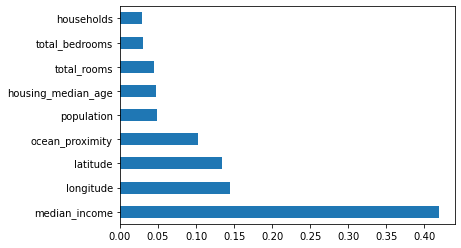

In [11]:
feat_importances = pd.Series(rf_grid.best_estimator_.feature_importances_, index=["longitude",
                                                                                  "latitude",
                                                                                  "housing_median_age",
                                                                                  "total_rooms",
                                                                                  "total_bedrooms",
                                                                                  "population",
                                                                                  "households",
                                                                                  "median_income",
                                                                                  "ocean_proximity"])
feat_importances.nlargest(9).plot(kind='barh')

In [33]:
ypred = rf_grid.predict(X_test)
print(ypred)
result = {'Actual':ypred,
        'Prediction':y_test}
 
# Create DataFrame
result_df = pd.DataFrame(result)
result_df.reset_index(inplace=True)
result_df

[185924.14658635 108406.28916933  82071.58777969 ... 122252.88343852
 157051.90456948 431283.87238   ]


,index,Actual,Prediction
0,0,185924.146586,159200.0
1,1,108406.289169,95000.0
2,2,82071.587780,83200.0
3,3,296839.158403,300700.0
4,4,160292.891566,167800.0
...,...,...,...
4081,4081,94984.102123,83400.0
4082,4082,162988.982597,133500.0
4083,4083,122252.883439,80700.0
4084,4084,157051.904569,105600.0


[]

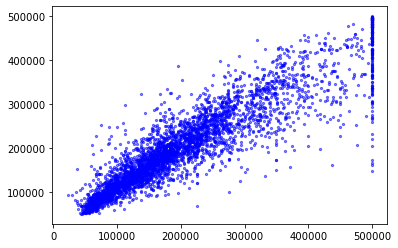

In [52]:
#plt.scatter(result_df['index'], result_df['Actual'], c ="blue", s = 1)
plt.scatter(result_df['Prediction'], result_df['Actual'], c ="b", s = 5, alpha= 0.5)
plt.plot()

In [ ]:
# Create Random Forest Regressor with the best parameters found with GridSerachCV
best_rfr = RandomForestRegressor(bootstrap=best_params["bootstrap"],
                                 max_features=best_params["max_features"], 
                                 max_depth=best_params["max_depth"], 
                                 min_samples_leaf=best_params["min_samples_leaf"],
                                 min_samples_split=best_params["min_samples_split"],
                                 n_estimators=best_params["n_estimators"], 
                                 random_state=False, 
                                 verbose=False)
best_rfr.fit(X_train, y_train)

In [ ]:
# Verify Score on the best Random Forest Regressor with the best parameters found
print("Score with R-squared on Train set:", best_rfr.score(X_train, y_train)) 
print("Score with R-squared on Test set:", best_rfr.score(X_test, y_test)) 